<a href="https://colab.research.google.com/github/AnushkaMazumdar2/Machine_Learning/blob/main/2348505_Lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING NECESSARY LIBRARIES

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score,ConfusionMatrixDisplay

IMPORTING THE DATASET

In [129]:
data = pd.read_csv("/content/spam_ham_dataset.csv")

DATASET VISUALIZATION

In [130]:
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [ ]:
data['text'].isnull().sum()

0

In [131]:
data = data.drop(columns=['label','Unnamed: 0'])

In [84]:
data['length'] = data['text'].apply(len)
data.head()

,text,label_num,length
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524
3,"Subject: photoshop , windows , office . cheap ...",1,414
4,Subject: re : indian springs\r\nthis deal is t...,0,336


In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

**1. DATA OVERVIEW GRAPH**

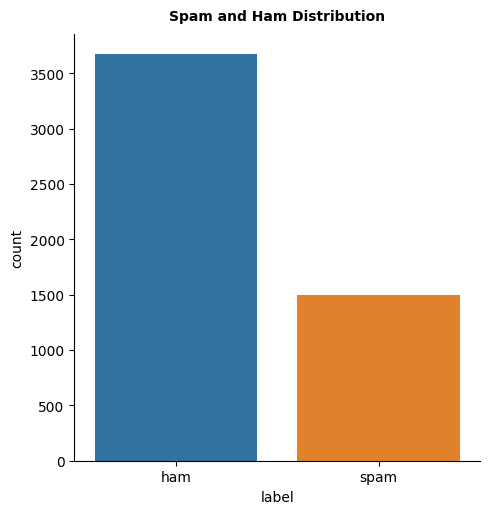

In [4]:
sns.catplot(x ="label",kind ="count", data=data)
plt.title("Spam and Ham Distribution",fontweight="black",size=10,pad=10)
plt.show()

As, we can see that the ham class has much more data points than spam. This has led to class imbalance

  DATA PREPROCESSING
  

*Preproccesing the text data using Natural Language Processing. First we remove the stopwords and punctuations from the text. Then we convert all the text to lower case. Then we convert those words to vectors for analysis using CountVectorizer*

In [132]:
#This function swaps 2 columns inside the dataframe
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df
#This function removes punctuation from string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [133]:
subjects = []
for i in range(len(data)):
    ln = data["text"][i]
    line = ""
    for i in ln:
        if(i == '\r'):
            break
        line = line + i
    line = line.replace("Subject" , "")
    subjects.append(line)

In [134]:
data['Subject'] = subjects

In [135]:
#Renaming the dataframe columns
data.columns = ["Email_text" , "Labels" , "Email_Subject"]
data.head()

,Email_text,Labels,Email_Subject
0,Subject: enron methanol ; meter # : 988291\r\n...,0,: enron methanol ; meter # : 988291
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,": hpl nom for january 9 , 2001"
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,: neon retreat
3,"Subject: photoshop , windows , office . cheap ...",1,": photoshop , windows , office . cheap . main ..."
4,Subject: re : indian springs\r\nthis deal is t...,0,: re : indian springs


In [136]:
#Swapping the dataframe columns
data = swap_columns(data, 'Labels', 'Email_Subject')
data.head()

,Email_text,Email_Subject,Labels
0,Subject: enron methanol ; meter # : 988291\r\n...,: enron methanol ; meter # : 988291,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",": hpl nom for january 9 , 2001",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",: neon retreat,0
3,"Subject: photoshop , windows , office . cheap ...",": photoshop , windows , office . cheap . main ...",1
4,Subject: re : indian springs\r\nthis deal is t...,: re : indian springs,0


In [137]:
#Converting all strings to lowercase
data['Email_Subject'] = data['Email_Subject'].str.lower()
data['Email_text'] = data['Email_text'].str.lower()

In [138]:
#Removing Punctuation from the data
data['Email_Subject'] = data['Email_Subject'].apply(remove_punctuations)
data['Email_text'] = data['Email_text'].apply(remove_punctuations)

In [37]:
data.head()

,Email_text,Email_Subject,Labels
0,subject enron methanol meter 988291\r\nthis...,enron methanol meter 988291,0
1,subject hpl nom for january 9 2001\r\n see at...,hpl nom for january 9 2001,0
2,subject neon retreat\r\nho ho ho we re aroun...,neon retreat,0
3,subject photoshop windows office cheap mai...,photoshop windows office cheap main trending,1
4,subject re indian springs\r\nthis deal is to ...,re indian springs,0


Splitting the dataset into Training and Testing Set

In [139]:
X_train, X_test , y_train, y_test = train_test_split(data['Email_text'], data['Labels'] , test_size=0.2)

In [140]:
#vectorize our training dataset
Vectorizer = CountVectorizer()
count= Vectorizer.fit_transform(X_train.values)

In [141]:
Spam_detection = MultinomialNB()
targets = y_train.values
Spam_detection.fit(count, targets)

MultinomialNB()

In [142]:
#make predictions
y_predict = Spam_detection.predict(Vectorizer.transform(X_test))
#test accuracy
accuracy_score(y_test, y_predict)

0.9797101449275363

**2. CONFUSION MATRIX GRAPH**

Without Laplace Smoothing

Text(50.722222222222214, 0.5, 'Actual')

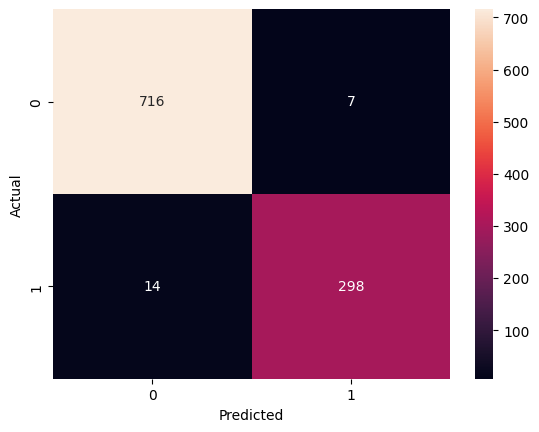

In [143]:
cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')

*The model has predicted 7 ham mails when they were actually spams. And it has predicted 14 spam mails when they were actually hams*

In [58]:
param_grid = {"alpha": [0.0001,0.001, 0.01, 0.1, 1.0, 10, 100, 1000]}

from sklearn.model_selection import GridSearchCV


grid_search = GridSearchCV(MultinomialNB(), param_grid, verbose=2)

In [59]:
#Choosing the best alpha using gridSearch
grid_search.fit(count, targets)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END .......................................alpha=0.0001; total time=   0.1s
[CV] END .......................................alpha=0.0001; total time=   0.1s
[CV] END .......................................alpha=0.0001; total time=   0.1s
[CV] END .......................................alpha=0.0001; total time=   0.1s
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END ........................................

GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100,
                                   1000]},
             verbose=2)

In [60]:
#Printing the best alpha
best_alpha = grid_search.best_params_['alpha']
print("Best Alpha:",best_alpha)

Best Alpha: 1.0


In [61]:
nb = MultinomialNB(alpha=best_alpha)
nb.fit(count,targets)

MultinomialNB()

In [62]:
y_pred = nb.predict(Vectorizer.transform(X_test))

In [65]:
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy: ", accuracy*100)

Accuracy:  97.3913043478261


In [64]:
print('Classification report on Naive Bayes')
print(classification_report(y_test,y_pred))

Classification report on Naive Bayes
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       759
           1       0.96      0.95      0.95       276

    accuracy                           0.97      1035
   macro avg       0.97      0.96      0.97      1035
weighted avg       0.97      0.97      0.97      1035



**2. CONFUSION MATRIX GRAPH**

With Laplace Smoothing

Text(50.722222222222214, 0.5, 'Actual')

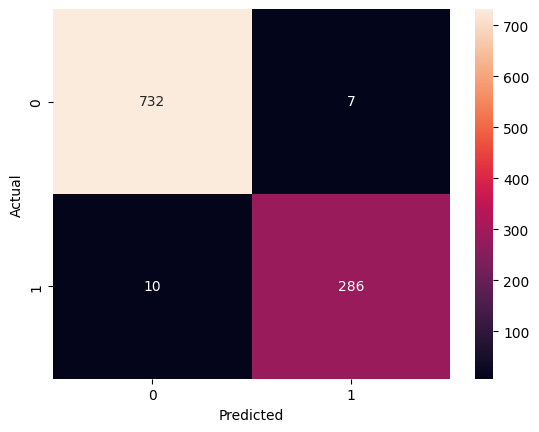

In [ ]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')

The model has predicted 7 ham mails when they were actually spams. And it has predicted 10 spam mails when they were actually hams

**3. RECEIVER OPERATING CHARACTERISTIC CURVE(ROC)**

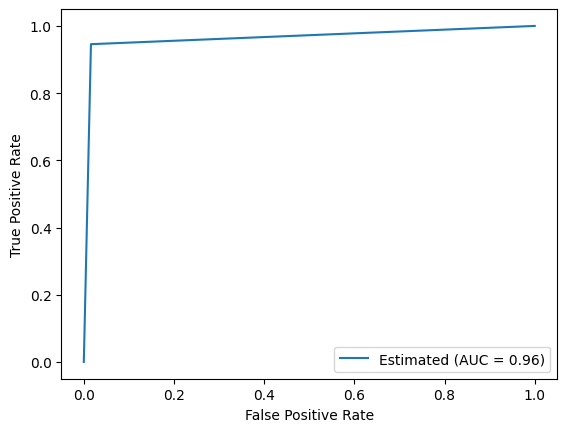

In [67]:
import sklearn
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test, y_pred)
roc_auc = sklearn.metrics.auc(fpr, tpr)
display = sklearn.metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='Estimated')
display.plot()
plt.show()

The Area Under Curve is 0.96, its a very high value for our model. The model has correctly predicted around 96% of the dataset

**4. PRECISION-RECALL CURVE**

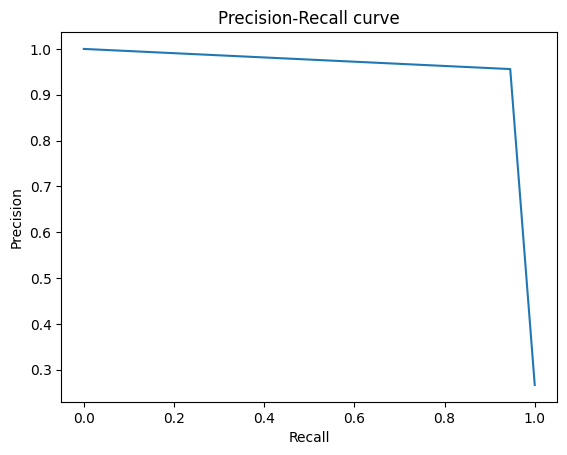

In [69]:
precision, recall, thresholds = sklearn.metrics.precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Precision-Recall curve")
plt.show()

- Precision tells how many values our model has correctly predicted out of all the positively predicted classes.
- Recall tells how many values our model has correctly predicted out of all the actual positive classes

**5. FEATURE IMPORTANCE GRAPH**

In [109]:
feature_names = Vectorizer.get_feature_names_out()
feature_imp = nb.feature_log_prob_[1]
feature_and_imp = list(zip(feature_names, feature_imp))
sorted_features = sorted(feature_and_imp,key=lambda x: x[1],reverse=True)
top = 10
importances = []
for feature, importance in sorted_features[:top]:
  print(f"Feature: {feature}, Importance: {importance}")
  importances.append(importance)

Feature: tont, Importance: -3.7704022895109635
Feature: trofholz, Importance: -4.116574511250548
Feature: andiron, Importance: -4.159906959069479
Feature: opponent, Importance: -4.243998757099316
Feature: ineffectual, Importance: -4.601904659802501
Feature: fortnightly, Importance: -4.822357454159788
Feature: jarred, Importance: -4.945251899363223
Feature: towles, Importance: -4.947968554117414
Feature: system, Importance: -5.255061600430136
Feature: xtoixd, Importance: -5.361079794506933


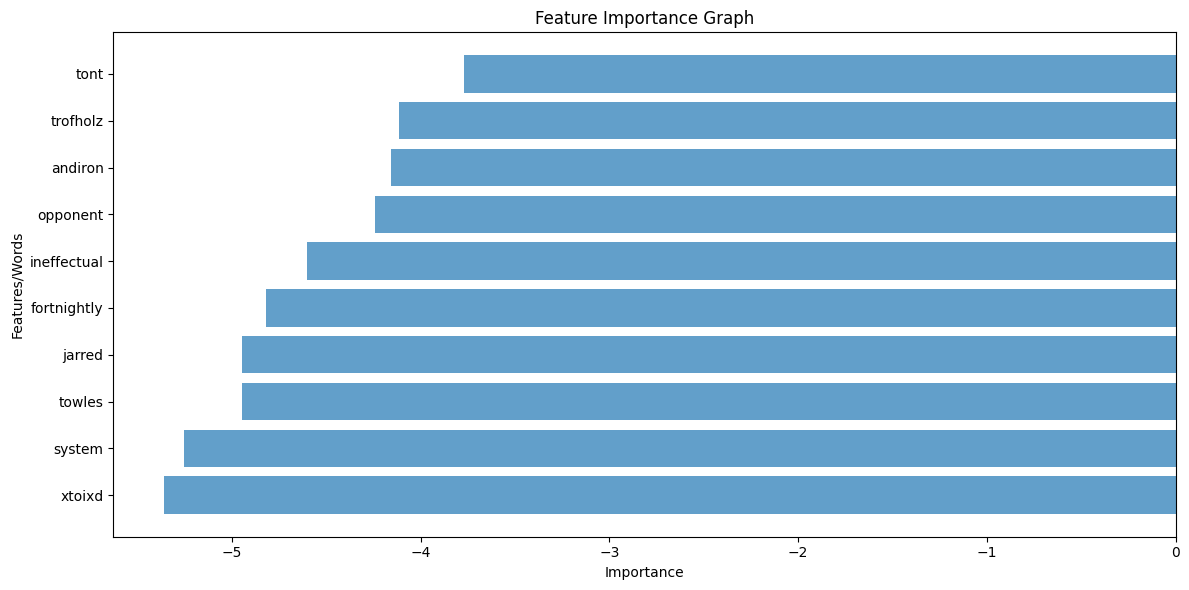

In [118]:
top_features,top_imp = zip(*sorted_features[:top])
plt.figure(figsize=(12,6))
plt.barh(range(len(top_features)),top_imp,align='center',alpha=0.7)
plt.yticks(range(len(top_features)),top_features)
plt.xlabel("Importance")
plt.ylabel("Features/Words")
plt.title("Feature Importance Graph")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

The most important words are xtoixd, system, towles,jarred, and so on.

**6. MODEL EVALUATION METRIC**

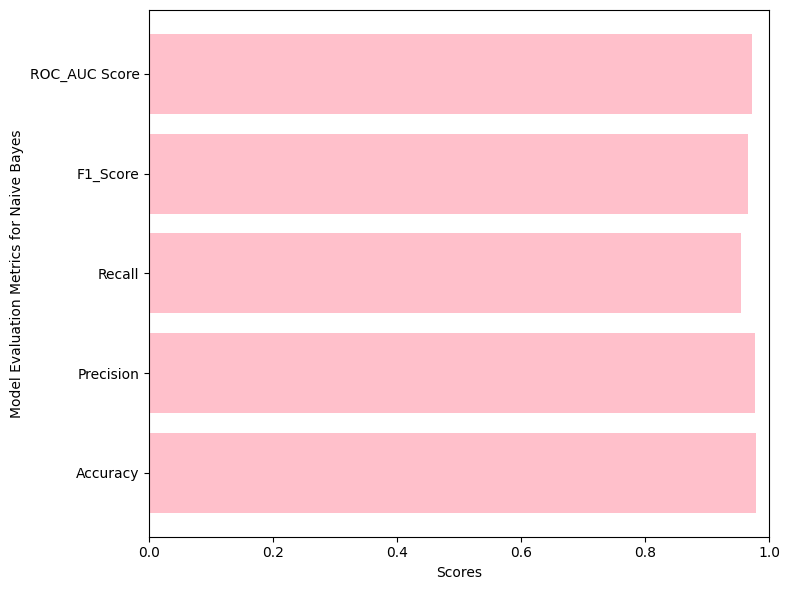

In [144]:
#The number of classifications a model correctly predicts divided by the total number of predictions
accuracy=  accuracy_score(y_test, y_predict)
#Precision is the quality of a positive prediction made by the model
precision= precision_score(y_test, y_predict)
#Recall is the number of data samples that a machine learning model correctly identifies as belonging to a class of interest
recall = recall_score(y_test, y_predict)
#F-Beta Score is a measure of resr's accuracy
F1_Score = f1_score(y_test,y_predict)
# The ROC AUC score tells us how efficient the model is. The higher the score, the better the model is at distinguish the positive and negative classes
roc_auc = sklearn.metrics.roc_auc_score(y_test,y_predict)

metrics = ['Accuracy','Precision','Recall','F1_Score','ROC_AUC Score']
metric_score = [accuracy,precision,recall,F1_Score,roc_auc]
plt.figure(figsize=(8,6))
plt.barh(metrics,metric_score,color='pink')
plt.xlabel('Scores')
plt.ylabel(f'Model Evaluation Metrics for Naive Bayes')
plt.xlim(0,1)
plt.tight_layout()
plt.show()

The metrics such as accuracy, precision, recall have given pretty high value. That means our model has been trained well

**7. THRESHOLD SELECTION GRAPH**

In [145]:
X_train, X_test, y_train, y_test = train_test_split(data['Email_text'], data['Labels'] , test_size=0.2)
nb = MultinomialNB(alpha=best_alpha)
nb.fit(count,targets)
y_pred = nb.predict(Vectorizer.transform(X_test))
precision1 = precision_score(y_test, y_pred)
recall1 = recall_score(y_test, y_pred)

In [146]:
X_train, X_test, y_train, y_test = train_test_split(data['Email_text'], data['Labels'] , test_size=0.25)
nb = MultinomialNB(alpha=best_alpha)
nb.fit(count,targets)
y_pred = nb.predict(Vectorizer.transform(X_test))
precision2 = precision_score(y_test, y_pred)
recall2 = recall_score(y_test, y_pred)

In [147]:
X_train, X_test, y_train, y_test = train_test_split(data['Email_text'], data['Labels'] , test_size=0.3)
nb = MultinomialNB(alpha=best_alpha)
nb.fit(count,targets)
y_pred = nb.predict(Vectorizer.transform(X_test))
precision3 = precision_score(y_test, y_pred)
recall3 = recall_score(y_test, y_pred)

In [148]:
X_train, X_test, y_train, y_test = train_test_split(data['Email_text'], data['Labels'] , test_size=0.15)
nb = MultinomialNB(alpha=best_alpha)
nb.fit(count,targets)
y_pred = nb.predict(Vectorizer.transform(X_test))
precision4 = precision_score(y_test, y_pred)
recall4 = recall_score(y_test, y_pred)

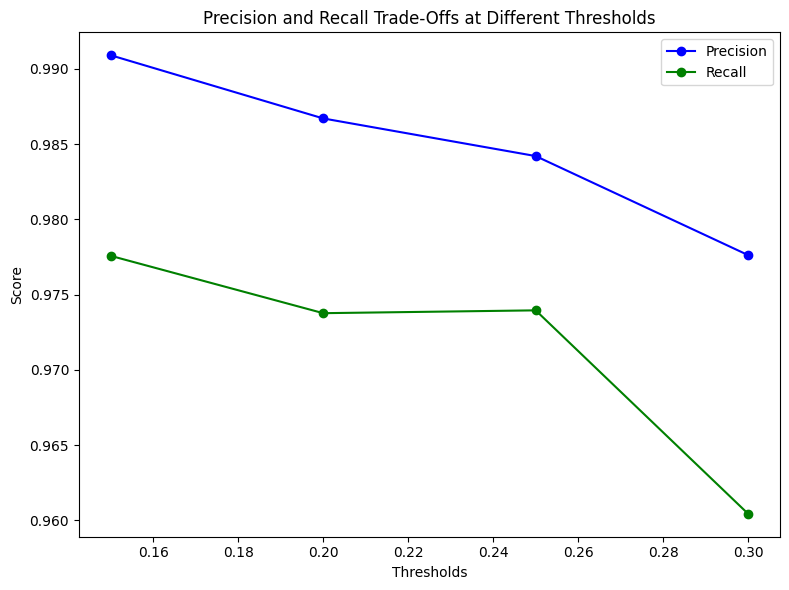

In [149]:
thresholds = [0.15,0.2,0.25,0.3]
precision = [precision4,precision1,precision2,precision3]
recall = [recall4,recall1,recall2,recall3]

plt.figure(figsize=(8,6))
plt.plot(thresholds,precision,marker='o',label='Precision',color='b')
plt.plot(thresholds,recall,marker='o',label='Recall',color='g')
plt.xlabel('Thresholds')
plt.ylabel('Score')
plt.title('Precision and Recall Trade-Offs at Different Thresholds')
plt.legend()
plt.tight_layout()
plt.show()

As we can see, the optimal threshold value is at 0.15